In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

OUTPUTS_FOLDER = '../outputs/'

experiment_path = OUTPUTS_FOLDER + experiment_filename

experiment = np.load(experiment_path, allow_pickle=True).item()

# OCO $\eta$ trend

## GDAS, $\eta$ = 0.1

In [51]:
experiment_filename = '2019-12-16.09-58-oco-0.1.npy'

experiment_path = OUTPUTS_FOLDER + experiment_filename

experiment = np.load(experiment_path, allow_pickle=True).item()

results = experiment['results']

queries = results['queries']

failure_rate = (queries == -1).sum() / queries.shape[0]

successful_queries = queries[queries != -1]
mean_queries = successful_queries.mean()
median_queries = np.median(successful_queries)

print(f'Failure rate: {failure_rate}')
print(f'Mean queries: {mean_queries}')
print(f'Median queries: {median_queries}')

Failure rate: 0.063
Mean queries: 303.4151547491996
Median queries: 18.0


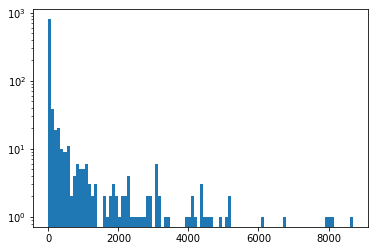

In [52]:
plt.hist(results['queries'], bins=100)
_ = plt.yscale('log')

<BarContainer object of 2 artists>

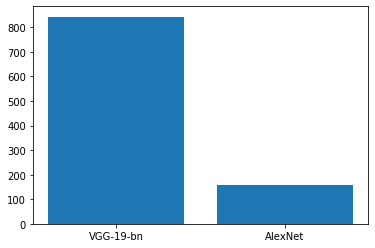

In [38]:
from collections import Counter

final_models = Counter(results['final_model'])

plt.bar(list(final_model), [final_model[model] for model in final_models])

## GDAS, $\eta$ = 0.1

In [53]:
experiment_filename = '2019-12-15.22-23-oco-100.npy'

experiment_path = OUTPUTS_FOLDER + experiment_filename

experiment = np.load(experiment_path, allow_pickle=True).item()

results = experiment['results']

queries = results['queries']

failure_rate = (queries == -1).sum() / queries.shape[0]

successful_queries = queries[queries != -1]
mean_queries = successful_queries.mean()
median_queries = np.median(successful_queries)

print(f'Failure rate: {failure_rate}')
print(f'Mean queries: {mean_queries}')
print(f'Median queries: {median_queries}')

Failure rate: 0.144
Mean queries: 684.4836448598131
Median queries: 14.0


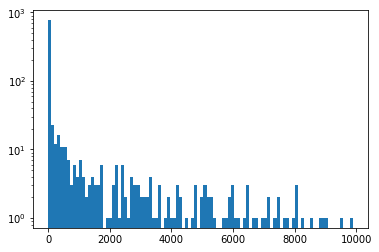

In [54]:
plt.hist(results['queries'], bins=100)
_ = plt.yscale('log')

<BarContainer object of 2 artists>

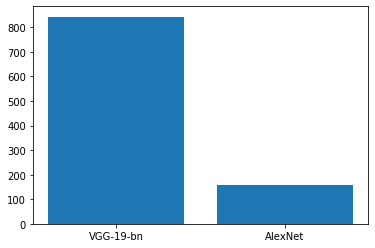

In [55]:
from collections import Counter

final_models = Counter(results['final_model'])

plt.bar(list(final_model), [final_model[model] for model in final_models])